Saving players.csv to players (7).csv
                    aggregate_stat_reg  NBA__3ptpct
aggregate_stat_reg            1.000000     0.567256
NBA__3ptpct                   0.567256     1.000000
               name  NBA__3ptpct  NCAA__3ptapg  NCAA_ft  NCAA__3ptpct  \
26    Arron Afflalo        0.386           5.4    0.781         0.373   
58        Ray Allen        0.400           5.1    0.779         0.448   
59       Tony Allen        0.282           2.2    0.682         0.347   
66     Rafer Alston        0.354           5.9    0.758         0.337   
70  Al-Farouq Aminu        0.337           1.7    0.687         0.238   

    NBA__3pt_total  
26          2206.9  
58          7410.0  
59           410.0  
66          2818.2  
70          1291.4  
                            OLS Regression Results                            
Dep. Variable:            NBA__3ptpct   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.315
Meth

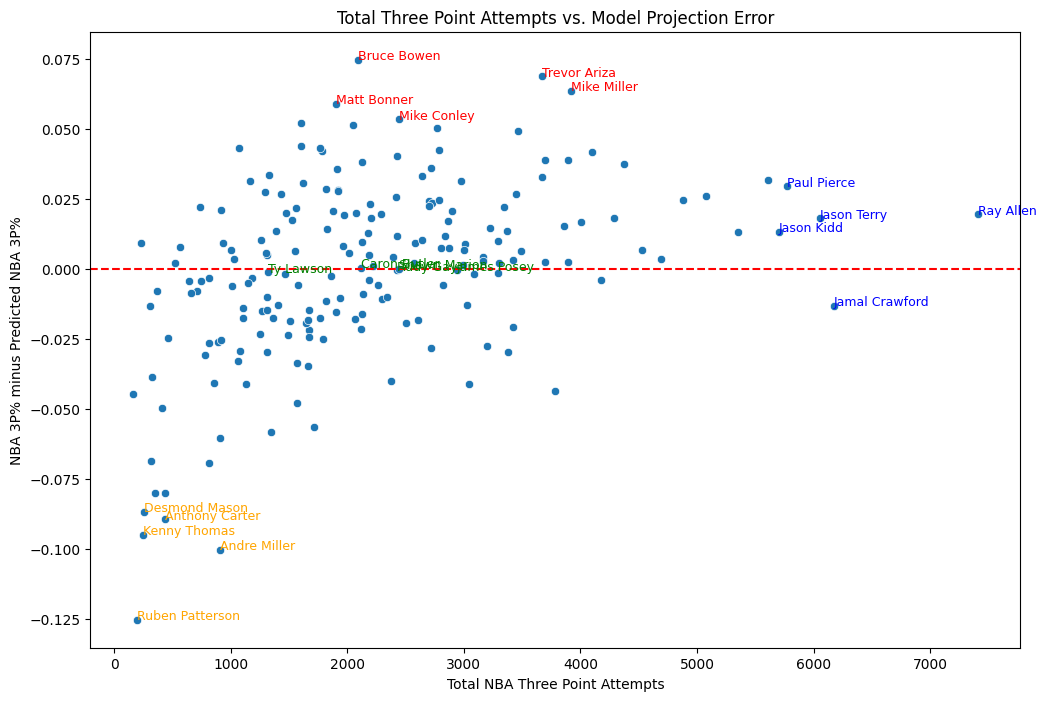

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statsmodels.api as sm

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

data['NBA__3pt_total'] = data['NBA__3ptapg'] * data['NBA_g_played']
coefficients = model.params

data_selected['aggregate_stat_reg'] = (
    coefficients['NCAA__3ptapg'] * data_selected['NCAA__3ptapg'] +
    coefficients['NCAA_ft'] * data_selected['NCAA_ft'] +
    coefficients['NCAA__3ptpct'] * data_selected['NCAA__3ptpct']
)

correlation_reg = data_selected[['aggregate_stat_reg', 'NBA__3ptpct']].corr()
print(correlation_reg)

data_filtered = data[
    (data['active_from'] >= 1995) &
    (data['NCAA_games'] > 15) &
    (data['NCAA__3ptapg'] > 1) &
    (data['NBA__3ptpg'] > 0) &
    (data['NBA_g_played'] > 500) &
    (data['NBA__3pt_total'] > 100)
]

selected_features = ['name', 'NBA__3ptpct', 'NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct', 'NBA__3pt_total']
data_selected = data_filtered[selected_features]
data_selected = data_selected.dropna()

print(data_selected.head())

X = data_selected[['NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']]
X = X.apply(pd.to_numeric, errors='coerce')
y = data_selected['NBA__3ptpct']
y = pd.to_numeric(y, errors='coerce')

y = y.loc[X.index]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

data_selected['Predicted_NBA__3ptpct'] = model.predict(X)
data_selected['Error'] = data_selected['NBA__3ptpct'] - data_selected['Predicted_NBA__3ptpct']

top_attempts = data_selected.nlargest(5, 'NBA__3pt_total')
best_match = data_selected.loc[abs(data_selected['Error']).nsmallest(5).index]
outshot = data_selected.nlargest(5, 'Error')
undershot = data_selected.nsmallest(5, 'Error')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='NBA__3pt_total', y='Error', data=data_selected)
plt.axhline(0, ls='--', color='red')

for i in range(len(data_selected)):
    if data_selected.iloc[i]['name'] in top_attempts['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='blue')
    elif data_selected.iloc[i]['name'] in best_match['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='green')
    elif data_selected.iloc[i]['name'] in outshot['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='red')
    elif data_selected.iloc[i]['name'] in undershot['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='orange')

plt.xlabel('Total NBA Three Point Attempts')
plt.ylabel('NBA 3P% minus Predicted NBA 3P%')
plt.title('Total Three Point Attempts vs. Model Projection Error')
plt.show()


Saving players.csv to players (8).csv
               name  NCAA_ftapg  NBA__3ptpct  NCAA__3ptapg  NCAA_ft  \
26    Arron Afflalo         3.6        0.386           5.4    0.781   
58        Ray Allen         3.5        0.400           5.1    0.779   
59       Tony Allen         5.2        0.282           2.2    0.682   
66     Rafer Alston         2.0        0.354           5.9    0.758   
70  Al-Farouq Aminu         5.7        0.337           1.7    0.687   

    NCAA__3ptpct  NBA__3pt_total  
26         0.373          2206.9  
58         0.448          7410.0  
59         0.347           410.0  
66         0.337          2818.2  
70         0.238          1291.4  
                            OLS Regression Results                            
Dep. Variable:            NBA__3ptpct   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     30.64
Date:    

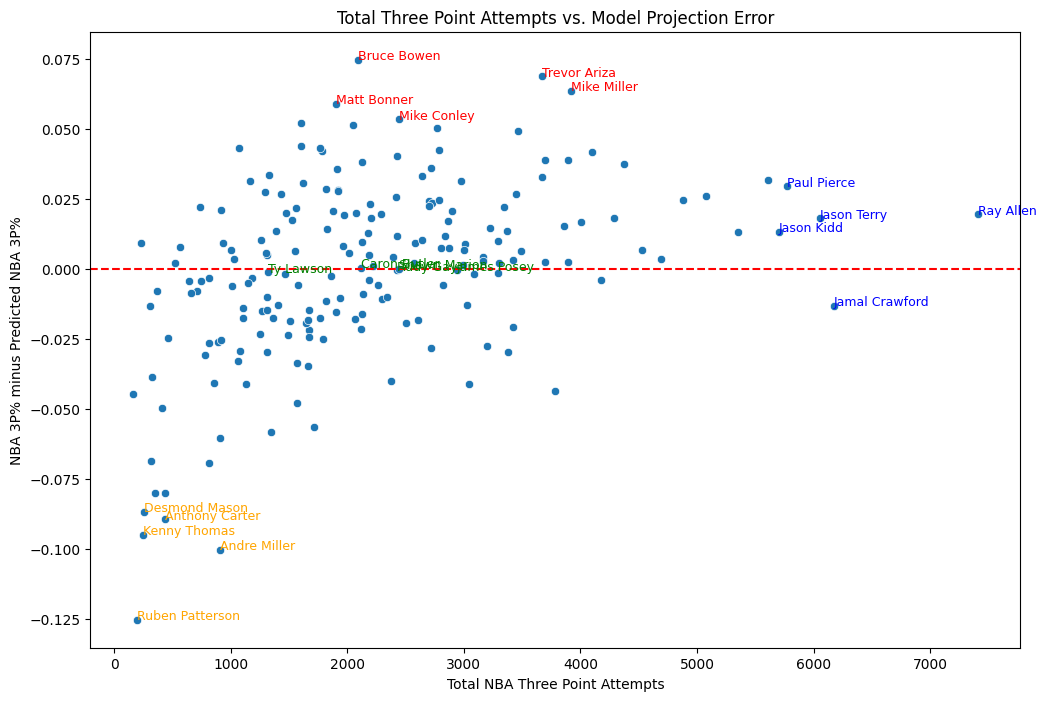

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statsmodels.api as sm

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

data['NBA__3pt_total'] = data['NBA__3ptapg'] * data['NBA_g_played']

data_filtered = data[
    (data['active_from'] >= 1995) &
    (data['NCAA_games'] > 15) &
    (data['NCAA__3ptapg'] > 1) &
    (data['NBA__3ptpg'] > 0) &
    (data['NBA_g_played'] > 500) &
    (data['NBA__3pt_total'] > 100)
]

selected_features = ['name', 'NCAA_ftapg', 'NBA__3ptpct', 'NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct', 'NBA__3pt_total']
data_selected = data_filtered[selected_features]
data_selected = data_selected.dropna()

print(data_selected.head())

X_initial = data_selected[['NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']]
X_initial = X_initial.apply(pd.to_numeric, errors='coerce')
y = data_selected['NBA__3ptpct']
y = pd.to_numeric(y, errors='coerce')

y = y.loc[X_initial.index]

X_initial = sm.add_constant(X_initial)

model_initial = sm.OLS(y, X_initial).fit()

print(model_initial.summary())

coefficients = model_initial.params

data_selected['aggregate_stat'] = (
    coefficients['NCAA__3ptapg'] * data_selected['NCAA__3ptapg'] +
    coefficients['NCAA_ft'] * data_selected['NCAA_ft'] +
    coefficients['NCAA__3ptpct'] * data_selected['NCAA__3ptpct']
)

X_final = data_selected[['NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA_ft', 'aggregate_stat']]
X_final = X_final.apply(pd.to_numeric, errors='coerce')

y = y.loc[X_final.index]

X_final = sm.add_constant(X_final)

model_with_agg = sm.OLS(y, X_final).fit()

print(model_with_agg.summary())

data_selected['Predicted_NBA__3ptpct'] = model_with_agg.predict(X_final)
data_selected['Error'] = data_selected['NBA__3ptpct'] - data_selected['Predicted_NBA__3ptpct']

top_attempts = data_selected.nlargest(5, 'NBA__3pt_total')
best_match = data_selected.loc[abs(data_selected['Error']).nsmallest(5).index]
outshot = data_selected.nlargest(5, 'Error')
undershot = data_selected.nsmallest(5, 'Error')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='NBA__3pt_total', y='Error', data=data_selected)
plt.axhline(0, ls='--', color='red')

for i in range(len(data_selected)):
    if data_selected.iloc[i]['name'] in top_attempts['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='blue')
    elif data_selected.iloc[i]['name'] in best_match['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='green')
    elif data_selected.iloc[i]['name'] in outshot['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='red')
    elif data_selected.iloc[i]['name'] in undershot['name'].values:
        plt.text(data_selected['NBA__3pt_total'].iloc[i], data_selected['Error'].iloc[i],
                 data_selected['name'].iloc[i], fontsize=9, color='orange')

plt.xlabel('Total NBA Three Point Attempts')
plt.ylabel('NBA 3P% minus Predicted NBA 3P%')
plt.title('Total Three Point Attempts vs. Model Projection Error')
plt.show()


Saving players.csv to players (13).csv
               name  NBA__3ptpct  NCAA__3ptapg  NCAA_ft  NCAA__3ptpct  \
26    Arron Afflalo        0.386           5.4    0.781         0.373   
58        Ray Allen        0.400           5.1    0.779         0.448   
59       Tony Allen        0.282           2.2    0.682         0.347   
66     Rafer Alston        0.354           5.9    0.758         0.337   
70  Al-Farouq Aminu        0.337           1.7    0.687         0.238   

    NBA__3pt_total  
26          2206.9  
58          7410.0  
59           410.0  
66          2818.2  
70          1291.4  
                            OLS Regression Results                            
Dep. Variable:            NBA__3ptpct   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     29.10
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.91e-15
T

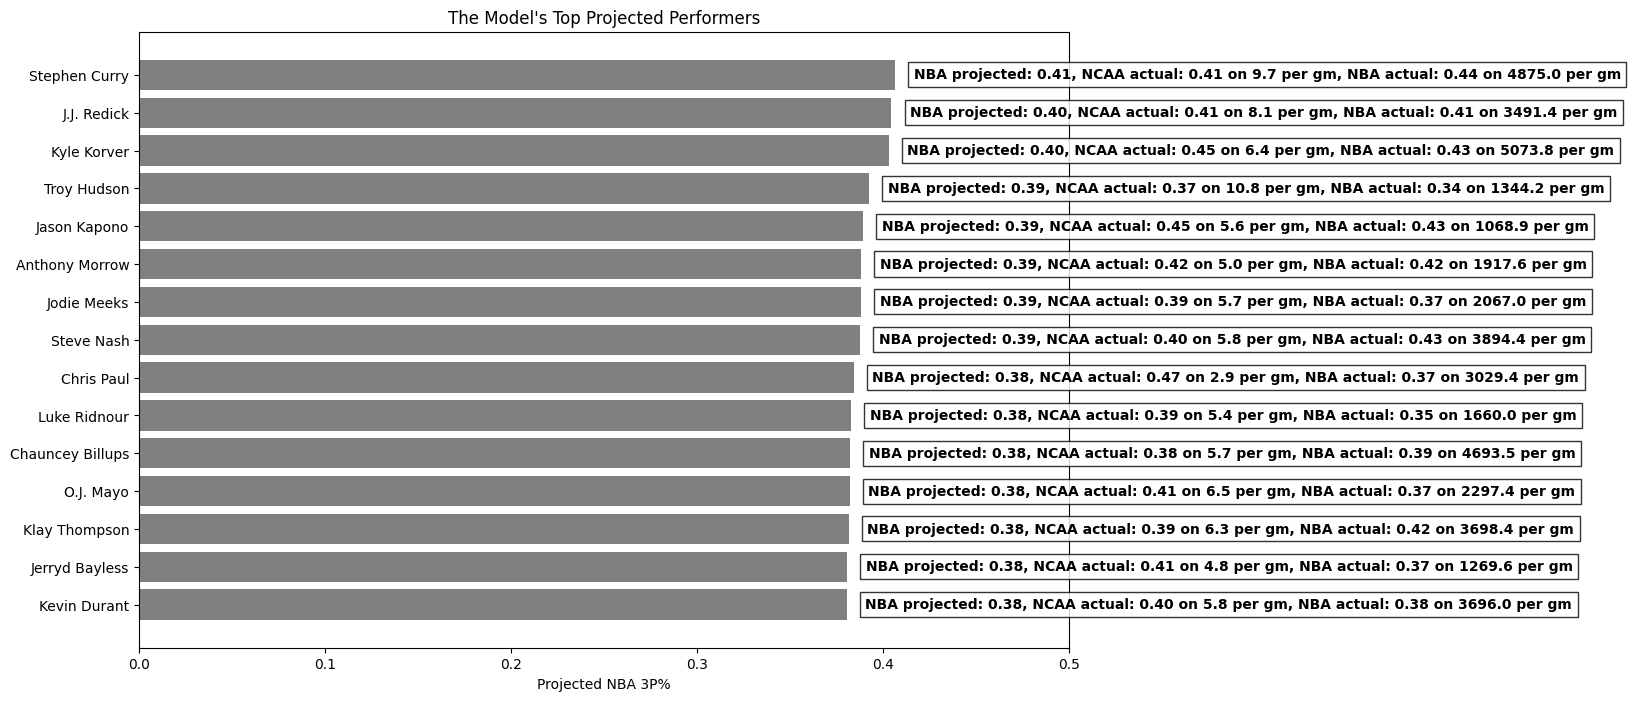

In [74]:
import pandas as pd
import plotly.express as px
from google.colab import files
import statsmodels.api as sm
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

data['NBA__3pt_total'] = data['NBA__3ptapg'] * data['NBA_g_played']

data_filtered = data[
    (data['active_from'] >= 1995) &
    (data['NCAA_games'] > 20) &
    (data['NCAA__3ptapg'] > 1) &
    (data['NBA__3ptpg'] > 0) &
    (data['NBA_g_played'] > 500) &
    (data['NBA__3pt_total'] > 300)
]

selected_features = ['name', 'NBA__3ptpct', 'NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct', 'NBA__3pt_total']
data_selected = data_filtered[selected_features]
data_selected = data_selected.dropna()

print(data_selected.head())

X_initial = data_selected[['NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']]
X_initial = X_initial.apply(pd.to_numeric, errors='coerce')
y = data_selected['NBA__3ptpct']
y = pd.to_numeric(y, errors='coerce')

y = y.loc[X_initial.index]

X_initial = sm.add_constant(X_initial)

model_initial = sm.OLS(y, X_initial).fit()

print(model_initial.summary())

coefficients = model_initial.params

data_selected['aggregate_stat'] = (
    coefficients['NCAA__3ptapg'] * data_selected['NCAA__3ptapg'] +
    coefficients['NCAA_ft'] * data_selected['NCAA_ft'] +
    coefficients['NCAA__3ptpct'] * data_selected['NCAA__3ptpct']
)

data_selected['aggregate_stat_percentile'] = rankdata(data_selected['aggregate_stat'], method='max') / len(data_selected) * 100

X_final = data_selected[['NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA_ft', 'aggregate_stat']]
X_final = X_final.apply(pd.to_numeric, errors='coerce')

y = y.loc[X_final.index]

X_final = sm.add_constant(X_final)

model_with_agg = sm.OLS(y, X_final).fit()

print(model_with_agg.summary())

data_selected['Predicted_NBA__3ptpct'] = model_with_agg.predict(X_final)
data_selected['Error'] = data_selected['NBA__3ptpct'] - data_selected['Predicted_NBA__3ptpct']

fig = px.scatter(
    data_selected,
    x='NBA__3pt_total',
    y='Error',
    hover_data={
        'name': True,
        'NCAA__3ptapg': True,
        'NCAA__3ptpct': True,
        'NCAA_ft': True,
        'aggregate_stat_percentile': True,
        'NBA__3pt_total': True
    },
    title='Total Three Point Attempts vs. Model Projection Error',
    labels={'NBA__3pt_total': 'Total NBA Three Point Attempts', 'Error': 'NBA 3P% minus Predicted NBA 3P%'}
)

fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    hovermode='closest'
)
fig.add_hline(y=0, line_dash="dash", line_color="red")

fig.show()

top_players = data_selected.sort_values(by='Predicted_NBA__3ptpct', ascending=False).head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_players['name'], top_players['Predicted_NBA__3ptpct'], color='grey')

for bar, row in zip(bars, top_players.itertuples()):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'NBA projected: {row.Predicted_NBA__3ptpct:.2f}, NCAA actual: {row.NCAA__3ptpct:.2f} on {row.NCAA__3ptapg:.1f} per gm, NBA actual: {row.NBA__3ptpct:.2f} on {row.NBA__3pt_total:.1f} per gm',
             va='center', ha='left', color='black', fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Projected NBA 3P%')
plt.title("The Model's Top Projected Performers")
plt.xlim(0, 0.5)
plt.gca().invert_yaxis()

plt.show()



In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload the 2023 NBA draft prospects CSV file
file_name_2023 = list(uploaded.keys())[0]  # Get the name of the uploaded file
prospects_2023 = pd.read_csv(file_name_2023)

print("First few rows of the 2023 prospects dataset:")
print(prospects_2023.head())

prospects_filtered = prospects_2023[
    (prospects_2023['GP'] > 15) &  # Played more than 20 NCAA games
    (prospects_2023['NCAA__3ptapg'] > 1)  # Attempted more than 1 NCAA three-pointer per game
]

print("First few rows after applying filters:")
print(prospects_filtered.head())

prospects_selected = prospects_filtered[['name', 'NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']].dropna()

prospects_selected['NCAA__3ptapg'] = pd.to_numeric(prospects_selected['NCAA__3ptapg'], errors='coerce')
prospects_selected['NCAA_ft'] = pd.to_numeric(prospects_selected['NCAA_ft'], errors='coerce')
prospects_selected['NCAA__3ptpct'] = pd.to_numeric(prospects_selected['NCAA__3ptpct'], errors='coerce')

prospects_selected = prospects_selected.dropna()



coefficients = model_initial.params
prospects_selected['aggregate_stat'] = (
    coefficients['NCAA__3ptapg'] * prospects_selected['NCAA__3ptapg'] +
    coefficients['NCAA_ft'] * prospects_selected['NCAA_ft'] +
    coefficients['NCAA__3ptpct'] * prospects_selected['NCAA__3ptpct']
)

X_prospects = prospects_selected[['NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']]
X_prospects = sm.add_constant(X_prospects)

X_prospects = pd.concat([X_prospects, prospects_selected['aggregate_stat']], axis=1)

prospects_selected['Predicted_NBA__3ptpct'] = model_with_agg.predict(X_prospects)

print("Predictions for the 2023 prospects:")
prospects_selected[['name', 'Predicted_NBA__3ptpct']].head(150)



Saving 2023 NBA Draft - Prospects.csv to 2023 NBA Draft - Prospects (16).csv
First few rows of the 2023 prospects dataset:
   Rank                name Position           School  Birthday    Age Height  \
0  -1.0  Wembanyama, Victor        C           France    1/4/04  20.50   7'4"   
1   0.0    Henderson, Scoot       PG  G-League Ignite    2/3/04  20.42   6'4"   
2   1.0     Miller, Brandon       SF          Alabama  11/22/02  21.62   6'9"   
3   2.0      Thompson, Amen       PG   Overtime Elite   1/30/03  21.43   6'7"   
4   3.0     Thompson, Ausar       SG   Overtime Elite   1/30/03  21.43   6'7"   

   Weight (lbs) Wingspan Hand Width  ... AST/36  STL/36  BLK/36  TOV/36  \
0         240.0     8'0"        NaN  ...    2.8     0.9     3.3     3.2   
1         195.0     6'9"        NaN  ...    7.6     1.3     0.6     4.1   
2         200.0    6'11"        NaN  ...    2.3     1.0     1.0     2.4   
3         214.0     7'0"       8.5"  ...    7.9     3.1     1.0     4.1   
4         218.0

,name,Predicted_NBA__3ptpct
0,"Wembanyama, Victor",0.376364
1,"Henderson, Scoot",0.355818
2,"Miller, Brandon",0.408995
3,"Thompson, Amen",0.328804
4,"Thompson, Ausar",0.349950
...,...,...
128,"da Silva, Tristan",0.380590
129,"Gaines, Eric",0.374357
130,"Hart, Hakim",0.376064
131,"Butler, Lamont",0.368999


In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
file_name_2023 = list(uploaded.keys())[0]
prospects_2023 = pd.read_csv(file_name_2023)

print("First few rows of the 2020 prospects dataset:")
print(prospects_2023.head())

prospects_filtered = prospects_2023[
    (prospects_2023['GP'] > 10) &  # Played more than 20 NCAA games
    (prospects_2023['NCAA__3ptapg'] > 1)  # Attempted more than 1 NCAA three-pointer per game
]

print("First few rows after applying filters:")
print(prospects_filtered.head())

prospects_selected = prospects_filtered[['name', 'NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']].dropna()

prospects_selected['NCAA__3ptapg'] = pd.to_numeric(prospects_selected['NCAA__3ptapg'], errors='coerce')
prospects_selected['NCAA_ft'] = pd.to_numeric(prospects_selected['NCAA_ft'], errors='coerce')
prospects_selected['NCAA__3ptpct'] = pd.to_numeric(prospects_selected['NCAA__3ptpct'], errors='coerce')

prospects_selected = prospects_selected.dropna()

# Display the preprocessed data

# Ensure the initial model is defined with the correct features
# Assuming you have already defined and trained the model_initial and model_with_agg as shown earlier
# If not, you need to define model_initial and model_with_agg again with the training data

coefficients = model_initial.params
prospects_selected['aggregate_stat'] = (
    coefficients['NCAA__3ptapg'] * prospects_selected['NCAA__3ptapg'] +
    coefficients['NCAA_ft'] * prospects_selected['NCAA_ft'] +
    coefficients['NCAA__3ptpct'] * prospects_selected['NCAA__3ptpct']
)

X_prospects = prospects_selected[['NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']]
X_prospects = sm.add_constant(X_prospects)

X_prospects = pd.concat([X_prospects, prospects_selected['aggregate_stat']], axis=1)

prospects_selected['Predicted_NBA__3ptpct'] = model_with_agg.predict(X_prospects)

print("Predictions for the 2023 prospects:")
prospects_selected[['name', 'Predicted_NBA__3ptpct']].head(150)


Saving 2020 NBA Draft - Prospects.csv to 2020 NBA Draft - Prospects (5).csv
First few rows of the 2023 prospects dataset:
   Rank              name  Ovr. Rank  Avg. Rank  ESPN Rank  NBADraft Rank  \
0  -1.0      Ball, LaMelo        1.0       2.00        1.0            6.0   
1   0.0  Edwards, Anthony        2.0       3.00        2.0            1.0   
2   1.0    Wiseman, James        3.0       3.88        3.0            7.0   
3   2.0   Okongwu, Onyeka        4.0       5.13        5.0            3.0   
4   3.0    Hayes, Killian        5.0       5.63       10.0            9.0   

   Athletic Rank  CBS Rank  Tankathon Rank  Ringer Rank  ...  AST/36  STL/36  \
0            1.0       1.0             1.0          3.0  ...     7.8     1.8   
1            3.0       3.0             8.0          2.0  ...     3.1     1.4   
2            2.0       2.0             3.0          5.0  ...     0.5     0.5   
3            4.0       8.0             2.0         10.0  ...     1.3     1.4   
4           10.

,name,Predicted_NBA__3ptpct
0,"Ball, LaMelo",0.364014
1,"Edwards, Anthony",0.382907
5,"Toppin, Obi",0.366918
6,"Avdija, Deni",0.349245
7,"Haliburton, Tyrese",0.401788
...,...,...
115,"Diallo, Alpha",0.343521
116,"McGriff, Cameron",0.376047
117,"Varner, Lesley",0.399649
118,"Bowden, Jordan",0.381830


In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
file_name_2023 = list(uploaded.keys())[0]
prospects_2023 = pd.read_csv(file_name_2023)

print("First few rows of the 2024 prospects dataset:")
print(prospects_2023.head())

prospects_filtered = prospects_2023[
    (prospects_2023['GP'] > 10) &  # Played more than 20 NCAA games
    (prospects_2023['NCAA__3ptapg'] > 1)  # Attempted more than 1 NCAA three-pointer per game
]

print("First few rows after applying filters:")
print(prospects_filtered.head())

prospects_selected = prospects_filtered[['name', 'NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']].dropna()

prospects_selected['NCAA__3ptapg'] = pd.to_numeric(prospects_selected['NCAA__3ptapg'], errors='coerce')
prospects_selected['NCAA_ft'] = pd.to_numeric(prospects_selected['NCAA_ft'], errors='coerce')
prospects_selected['NCAA__3ptpct'] = pd.to_numeric(prospects_selected['NCAA__3ptpct'], errors='coerce')

prospects_selected = prospects_selected.dropna()

# Display the preprocessed data

# Ensure the initial model is defined with the correct features
# Assuming you have already defined and trained the model_initial and model_with_agg as shown earlier
# If not, you need to define model_initial and model_with_agg again with the training data

coefficients = model_initial.params
prospects_selected['aggregate_stat'] = (
    coefficients['NCAA__3ptapg'] * prospects_selected['NCAA__3ptapg'] +
    coefficients['NCAA_ft'] * prospects_selected['NCAA_ft'] +
    coefficients['NCAA__3ptpct'] * prospects_selected['NCAA__3ptpct']
)

X_prospects = prospects_selected[['NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct']]
X_prospects = sm.add_constant(X_prospects)

X_prospects = pd.concat([X_prospects, prospects_selected['aggregate_stat']], axis=1)

prospects_selected['Predicted_NBA__3ptpct'] = model_with_agg.predict(X_prospects)

print("Predictions for the 2023 prospects:")
prospects_selected[['name', 'Predicted_NBA__3ptpct']].head(150)

Saving 2024 NBA Draft - Prospects.csv to 2024 NBA Draft - Prospects (2).csv
First few rows of the 2023 prospects dataset:
   Rank                 name Position     School Birthday    Age     Height  \
0  -1.0      Sarr, Alexandre        C  Australia  4/26/05  19.19       7'1"   
1   0.0       Sheppard, Reed       PG   Kentucky  6/24/04  20.03       6'3"   
2   1.0  Risacher, Zaccharie       SF     France   4/8/05  19.24  6' 9.75''   
3   2.0     Clingan, Donovan        C      UConn  2/23/04  20.37       7'3"   
4   3.0      Castle, Stephon       SG      UConn  11/1/04  19.68    6'6.75"   

   Wingspan Weight (lbs) Hand Width  ... STL/36 BLK/36  TOV/36  PF/36  FGA/36  \
0   7'4.25"          224        10"  ...    1.0    2.7     2.3    2.9     7.7   
1   6'6.25"          182         9"  ...    3.1    0.9     2.5    2.4     5.4   
2  6' 9.5''          195      8.75"  ...    1.3    0.5     2.1    3.9     5.4   
3   7'6.75"          282     10.25"  ...    0.8    4.0     1.3    3.2     8.5  

,name,Predicted_NBA__3ptpct
0,"Sarr, Alexandre",0.351095
1,"Sheppard, Reed",0.413738
2,"Risacher, Zaccharie",0.369082
4,"Castle, Stephon",0.354348
5,"Buzelis, Matas",0.348016
...,...,...
104,"Strazel, Matthew",0.377805
105,"Nkamhoua, Olivier",0.353202
106,"Battle, RaeQuan",0.390597
107,"Armstrong, Mark",0.361368


In [ ]:
coefficients = model.params

data_selected['aggregate_stat_reg'] = (
    coefficients['NCAA__3ptapg'] * data_selected['NCAA__3ptapg'] +
    coefficients['NCAA_ft'] * data_selected['NCAA_ft'] +
    coefficients['NCAA__3ptpct'] * data_selected['NCAA__3ptpct']
)

correlation_reg = data_selected[['aggregate_stat_reg', 'NBA__3ptpct']].corr()
print(correlation_reg)
fig = px.scatter(
    data_selected,
    x='aggregate_stat_percentile',
    y='NBA__3ptpct',
    hover_data={
        'name': True,
        'NCAA__3ptapg': True,
        'NCAA__3ptpct': True,
        'NCAA_ft': True,
        'aggregate_stat_percentile': True,
        'NBA__3pt_total': True
    },
    title='Aggregate Stat Percentile vs Actual NBA 3P%',
    labels={'aggregate_stat_percentile': 'Aggregate Stat Percentile', 'NBA__3ptpct': 'Actual NBA 3P%'}
)

fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    hovermode='closest'
)

fig.show()

print("Regression Equation:")
print(f"NBA__3ptpct = {coefficients['const']} + {coefficients['NCAA__3ptapg']}*NCAA__3ptapg + "
      f"{coefficients['NCAA_ft']}*NCAA_ft + "
      f"{coefficients['NCAA__3ptpct']}*NCAA__3ptpct")

                    aggregate_stat_reg  NBA__3ptpct
aggregate_stat_reg            1.000000     0.566175
NBA__3ptpct                   0.566175     1.000000


Regression Equation:
NBA__3ptpct = 0.1760850989742695 + 0.003932637947062386*NCAA__3ptapg + 0.1722333913345827*NCAA_ft + 0.1482207296475965*NCAA__3ptpct


In [ ]:
correlation_matrix = data_selected[['NBA__3ptpct', 'NCAA__3ptapg', 'NCAA_ft', 'NCAA__3ptpct', 'aggregate_stat_reg']].corr()
print(correlation_matrix)



                    NBA__3ptpct  NCAA__3ptapg   NCAA_ft  NCAA__3ptpct  \
NBA__3ptpct            1.000000      0.392668  0.507655      0.453996   
NCAA__3ptapg           0.392668      1.000000  0.468405      0.328770   
NCAA_ft                0.507655      0.468405  1.000000      0.579871   
NCAA__3ptpct           0.453996      0.328770  0.579871      1.000000   
aggregate_stat_reg     0.566175      0.696778  0.915629      0.764950   

                    aggregate_stat_reg  
NBA__3ptpct                   0.566175  
NCAA__3ptapg                  0.696778  
NCAA_ft                       0.915629  
NCAA__3ptpct                  0.764950  
aggregate_stat_reg            1.000000  


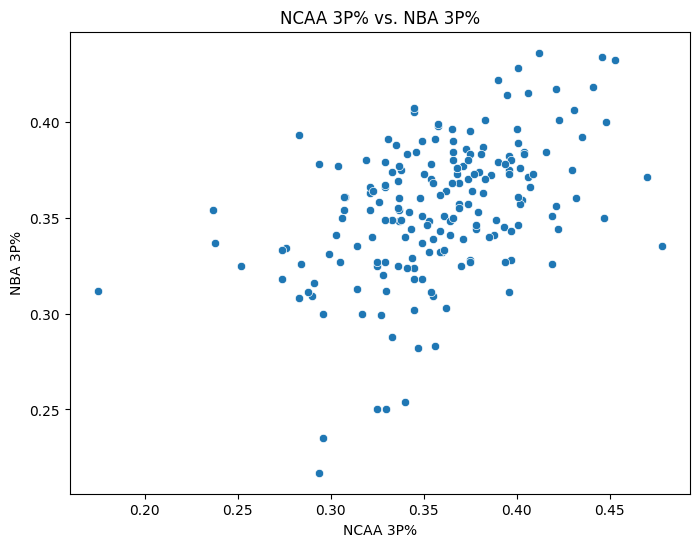

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NCAA__3ptpct', y='NBA__3ptpct', data=data_selected)
plt.xlabel('NCAA 3P%')
plt.ylabel('NBA 3P%')
plt.title('NCAA 3P% vs. NBA 3P%')
plt.show()

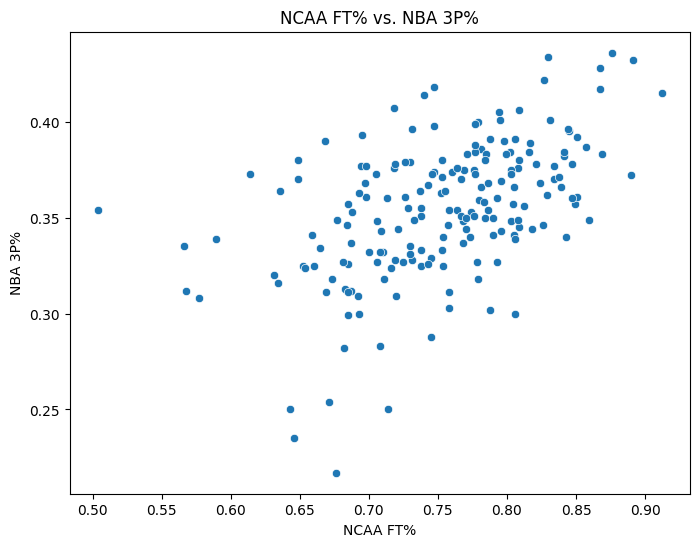

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NCAA_ft', y='NBA__3ptpct', data=data_selected)
plt.xlabel('NCAA FT%')
plt.ylabel('NBA 3P%')
plt.title('NCAA FT% vs. NBA 3P%')
plt.show()



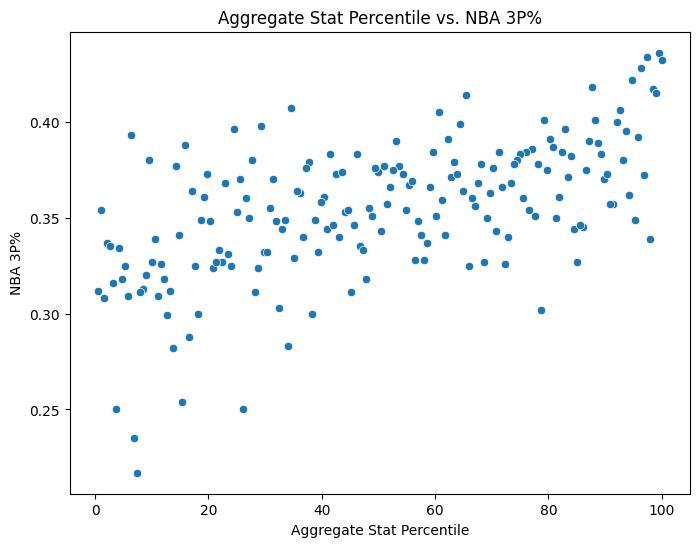

In [ ]:
data_selected['aggregate_stat_percentile'] = rankdata(data_selected['aggregate_stat'], method='max') / len(data_selected) * 100

plt.figure(figsize=(8, 6))
sns.scatterplot(x='aggregate_stat_percentile', y='NBA__3ptpct', data=data_selected)
plt.xlabel('Aggregate Stat Percentile')
plt.ylabel('NBA 3P%')
plt.title('Aggregate Stat Percentile vs. NBA 3P%')
plt.show()



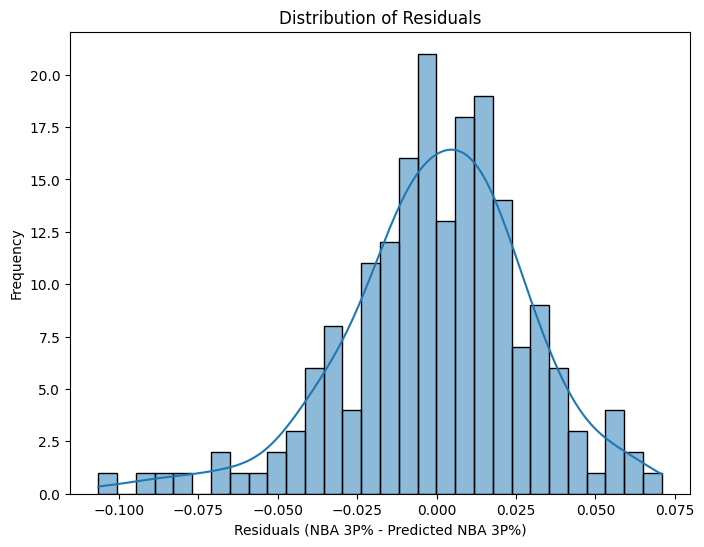

Middle 80% Error Bounds: -0.0349 to 0.0327
Middle 50% Error Bounds: -0.0147 to 0.0177


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data_selected['Error'], kde=True, bins=30)
plt.xlabel('Residuals (NBA 3P% - Predicted NBA 3P%)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


error_percentiles = np.percentile(data_selected['Error'], [10, 25, 75, 90])

# Print the error bounds
print(f"Middle 80% Error Bounds: {error_percentiles[0]:.4f} to {error_percentiles[3]:.4f}")
print(f"Middle 50% Error Bounds: {error_percentiles[1]:.4f} to {error_percentiles[2]:.4f}")

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=1)
aggregate_stat_pca = pca.fit_transform(X)

data_selected['aggregate_stat_pca'] = aggregate_stat_pca

correlation_pca = data_selected[['aggregate_stat_pca', 'NBA__3ptpct']].corr()
print(correlation_pca)

                    aggregate_stat_pca  NBA__3ptpct
aggregate_stat_pca            1.000000     0.379289
NBA__3ptpct                   0.379289     1.000000


In [72]:
data_selected['aggregate_stat_avg'] = (
    data_selected['NCAA__3ptapg'] +
    data_selected['NCAA_ft'] +
    data_selected['NCAA__3ptpct']
) / 4

correlation_avg = data_selected[['aggregate_stat_avg', 'NBA__3ptpct']].corr()
print(correlation_avg)

                    aggregate_stat_avg  NBA__3ptpct
aggregate_stat_avg            1.000000     0.413626
NBA__3ptpct                   0.413626     1.000000


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        Feature         VIF
0         const  137.609358
1  NCAA__3ptapg    1.294808
2       NCAA_ft    1.753933
3  NCAA__3ptpct    1.519424


In [68]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, pval_bp, _, _ = het_breuschpagan(model.resid, X)
print(f"P-value from Breusch-Pagan test: {pval_bp}")

from statsmodels.stats.diagnostic import het_white

white_test_results = het_white(model.resid, X)
print(f"P-value from White's test: {white_test_results[1]}")

P-value from Breusch-Pagan test: 0.001172113053714921
P-value from White's test: 0.002459868109925771


       cooks_d  hat_diag
26    0.000819  0.010198
58    0.003228  0.032668
59    0.007765  0.013012
66    0.000139  0.018171
70    0.009609  0.047666
...        ...       ...
4420  0.001452  0.054858
4425  0.004231  0.054123
4513  0.002787  0.055424
4550  0.001330  0.009003
4553  0.006295  0.023315

[194 rows x 2 columns]


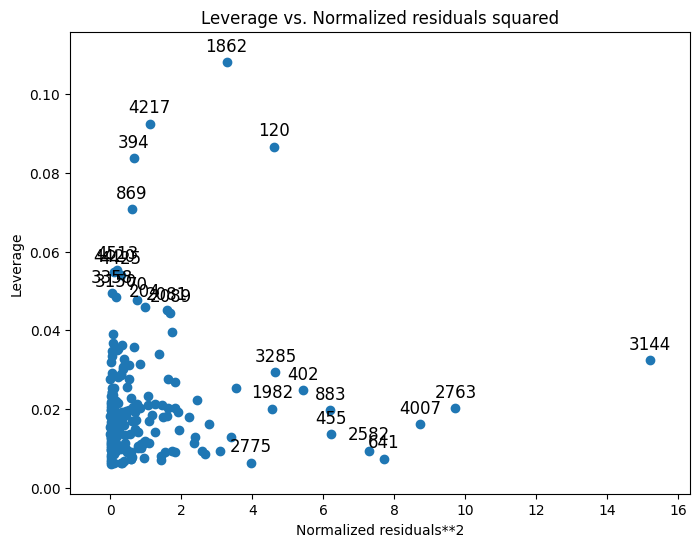

In [67]:
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt


influence = OLSInfluence(model)
influence_summary = influence.summary_frame()

print(influence_summary[['cooks_d', 'hat_diag']])

from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
plot_leverage_resid2(model, ax=ax)
plt.show()